In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.interpolate import UnivariateSpline as interpolateUS
import importlib

In [2]:
import multiprocessing as mp
from itertools import repeat
from functools import partial

In [6]:
import cleftpool
import qfuncpool


In [5]:
pfile = './pklin_RunPB.txt'
qfile = './qfile_RunPB.txt'
rfile = './rfile_RunPB.txt'
zvfile = './ps00_hh_RunPB_46_z000.dat'
ensfile = './RunPB/Ens_RunPB_4096_46_II_z00.dat'
ensfile2 = 'Ens_RunPB_4096_46_II_z00_fine.dat'
ens1file = './RunPB/Ens_RunPB_4096_46_I_z00.dat'
QRfile = './RunPB/QR_RunPB_I_z00.dat'
QR2file = './RunPB/QR_RunPB_II_z00.dat'
zv = np.loadtxt(zvfile).T
ens = np.loadtxt(ensfile).T
ens1 = np.loadtxt(ens1file).T
qr = np.loadtxt(QRfile).T
qr2 = np.loadtxt(QR2file).T
qf = np.loadtxt(qfile).T
rf = np.loadtxt(rfile).T


In [11]:
klin, plin = np.loadtxt(pfile, unpack=True)
kk = np.logspace(-6, 4, 1e4)



[]

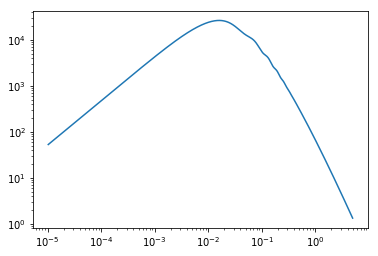

In [13]:
plt.plot(klin, plin)
plt.loglog()


In [134]:
# importlib.reload(qfuncpool)
importlib.reload(cleftpool)
qft = qfuncpool.Qfunc(klin, plin, qfile, rfile, extrapker=False)
cl = cleftpool.CLEFT(pfile = pfile, qfile=qfile, rfile=rfile,  npool=32, extrapker=True)
pk = cleftpool.make_table(cl, nk = 50, npool=32).T

Q & R kernels created
xi0lin
ERROR: Runaway index on left side, bad interpolation. Left index =  -8.1403505214e-07 1.00e-03


/global/homes/c/chmodi/.conda/envs/ipynersc35/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/global/homes/c/chmodi/.conda/envs/ipynersc35/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


xi0loop13
ERROR: Runaway index on left side, bad interpolation. Left index =  -6.10228172048e-06 1.00e-04
xi0loop22
ERROR: Runaway index on left side, bad interpolation. Left index =  -6.56750460132e-06 1.00e-04
Matter q-functions created
corr
ERROR: Runaway index on left side, bad interpolation. Left index =  -0.444672089614 1.00e-05
Bias(local) q-functions created
js2
ERROR: Runaway index on left side, bad interpolation. Left index =  -0.44321595784 1.00e-05
zeta
ERROR: Runaway index on left side, bad interpolation. Left index =  -0.444672089614 1.00e-05
zeta
ERROR: Runaway index on left side, bad interpolation. Left index =  -0.44321595784 1.00e-05
zeta
ERROR: Runaway index on left side, bad interpolation. Left index =  -0.443215693588 1.00e-05
Shear q-functions created


In [145]:
def tpsmall(lab, q, a, l = 1e-2):
    '''Print where the function (a) falls below
    the designated limit. Useful to see where to extrapolate from
    '''
    mid = np.where(q >1)[0][0]
    mid2 = np.where(q >100)[0][0]
    try:
        q1 = q[np.where(a[:mid] <l)[0][-1]]
    except:
        q1 = 'Big'
    try:
        q2 = q[mid2 + np.where(a[mid2:] <l)[0][0]]
    except:
        q2 = 'Big'
    print(lab, q1, q2)

xi0lin
ERROR: Runaway index on left side, bad interpolation. Left index =  -8.1403505214e-07 1.00e-03
E0lin Big 4896.31090657
E2lin 0.0576867547255 6887.85202484
xi0loop13
ERROR: Runaway index on left side, bad interpolation. Left index =  -6.10228172048e-06 1.00e-04
xi0loop22
ERROR: Runaway index on left side, bad interpolation. Left index =  -6.56750460132e-06 1.00e-04
E0loop Big 122.126154103
E2loop 0.00703209466433 253.536449397
E1loop 0.997240436166 100.230546889
E3loop 0.997240436166 100.230546889


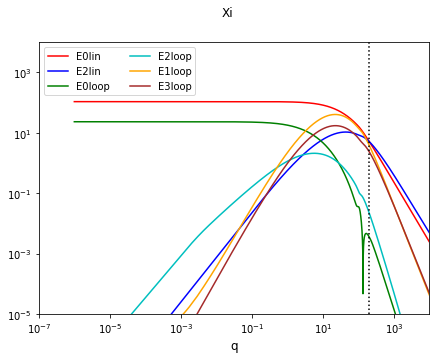

In [135]:
#xi
qv = cl.qv.copy()
qil,  qih = np.where(qv>1e-2)[0][0], np.where(qv>300)[0][0]
qil, qih

fig, ax = plt.subplots(1, 1, figsize = (7, 5))

sk = 30
ms = 2

col, tp, lab, c = 2, cl.qf.xi0lin()[1], 'E0lin', 'r'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

col, tp, lab, c = 3, cl.qf.xi2lin()[1], 'E2lin', 'b'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

tp, lab, c =  cl.qf.xi0loop()[1], 'E0loop', 'g'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

tp, lab, c =  cl.qf.xi2loop()[1], 'E2loop', 'c'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

col, tp, lab, c = 10, cl.qf.xi1loop()[1], 'E1loop', 'orange'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

col, tp, lab, c = 11, cl.qf.xi3loop()[1], 'E3loop', 'brown'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

ax.set_ylim(1e-5,1e4)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('q', fontsize = 12)
ax.set_xlim(1e-7, 1e4)

ax.axvline(200, color = 'k', ls = ":")
ax.legend(loc = 0, ncol = 2)
    
plt.suptitle('Xi')




Xlin 0.0484918292061 Big
Xloop 0.00550141044167 Big
Ylin 0.0360541860568 9894.62956996
Yloop 0.00385264129939 306.160102672


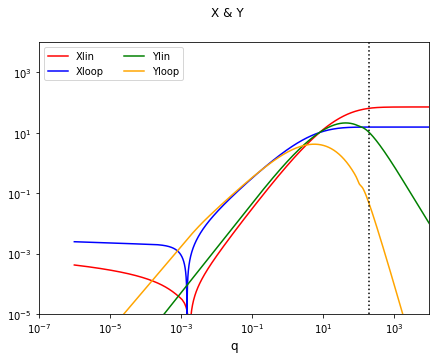

In [136]:

#xi
qv = cl.qv.copy()
qil,  qih = np.where(qv>1e-2)[0][0], np.where(qv>400)[0][0]

fig, ax = plt.subplots(1, 1, figsize = (7, 5))

sk = 30
ms = 2

tp, lab, c = cl.Xlin, 'Xlin', 'r'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

tp, lab, c = cl.Xloop, 'Xloop', 'b'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

tp, lab, c = cl.Ylin, 'Ylin', 'g'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

tp, lab, c = cl.Yloop, 'Yloop', 'orange'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

# ax.plot(qv,qv**-2, 'k--')

ax.set_ylim(1e-5,1e4)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('q', fontsize = 12)
ax.set_xlim(1e-7, 1e4)

ax.axvline(200, color = 'k', ls = ":")
ax.legend(loc = 0, ncol = 2)
    
plt.suptitle('X & Y')



x10(/2) 0.00350069613798 Big
x20 0.00538732452102 142.697196734
y10(/2) 0.00113241444495 360.957230322
y20 0.997240436166 100.230546889


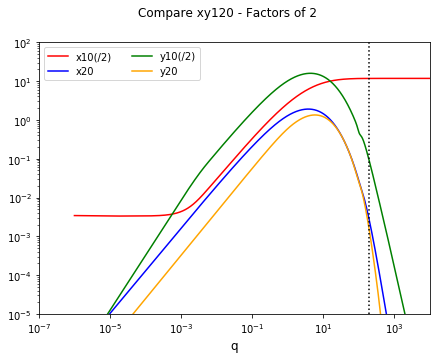

In [137]:
#xi
qv = cl.qv.copy()
qil,  qih = np.where(qv>1e-2)[0][0], np.where(qv>200)[0][0]

fig, ax = plt.subplots(1, 1, figsize = (7, 5))

c = 'r'
tp, lab = cl.x10, 'x10(/2)'
tp2 =1/2.* ens[-6]
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

c = 'b'
tp, lab = cl.x20, 'x20'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

c = 'g'
tp, lab = 2*cl.y10, 'y10(/2)'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

c = 'orange'
tp, lab = cl.y20, 'y20'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)


ax.set_ylim(1e-5,1e2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('q', fontsize = 12)
ax.set_xlim(1e-7, 1e4)

ax.axvline(200, color = 'k', ls = ":")
ax.legend(loc = 0, ncol = 2)
    
plt.suptitle('Compare xy120 - Factors of 2')
# plt.savefig('./plots/xy120.pdf')




u20 0.997240436166 100.230546889
u11 0.997240436166 100.230546889
v10 Big 100.230546889
v12 Big 100.230546889
u10 0.997240436166 100.230546889
u3 0.997240436166 100.230546889


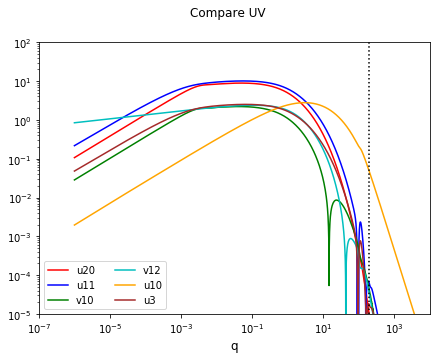

In [138]:
#xi
qv = cl.qv.copy()
qil,  qih = np.where(qv>1e-2)[0][0], np.where(qv>200)[0][0]
qil, qih

fig, ax = plt.subplots(1, 1, figsize = (7, 5))

c = 'r'
tp, lab = cl.u20, 'u20'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

c = 'b'
tp, lab = cl.u11, 'u11'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)


c = 'g'
tp, lab = cl.v10, 'v10'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)


c = 'c'
tp, lab = cl.v12, 'v12'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)


c = 'orange'
tp, lab = cl.u10, 'u10'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

c = 'brown'
tp, lab = cl.u30, 'u3'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)


ax.set_ylim(1e-5,1e2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('q', fontsize = 12)
ax.set_xlim(1e-7, 1e4)

ax.axvline(200, color = 'k', ls = ":")
ax.legend(loc = 0, ncol = 2)
        
plt.suptitle('Compare UV')
# plt.savefig('./plots/uv.pdf')



chi Big 100.230546889
corr Big 100.230546889
zeta Big 100.230546889


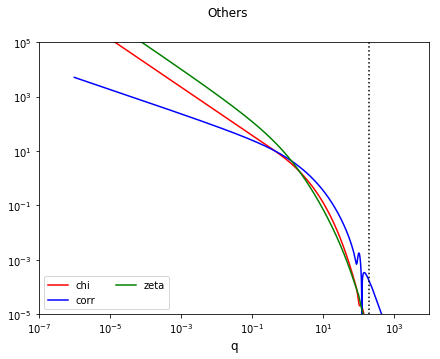

In [139]:

#xi
qv = cl.qv.copy()

fig, ax = plt.subplots(1, 1, figsize = (7, 5))

c = 'r' 
tp, lab = cl.chi, 'chi'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)

c = 'b' 
tp, lab = cl.corr, 'corr'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)


c = 'g' 
tp, lab = cl.zeta, 'zeta'
ax.plot(qv, abs(tp), label = lab, color = c)
tpsmall(lab, qv, tp)



ax.set_ylim(1e-5,1e5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('q', fontsize = 12)
ax.set_xlim(1e-7, 1e4)

ax.axvline(200, color = 'k', ls = ":")
ax.legend(loc = 0, ncol = 2)

plt.suptitle('Others')
# plt.savefig('./plots/others.pdf')




In [144]:
# q1, q2 = 1e-3, 8000
# q, p = qft.xi0lin()
# q1, q2 = numpy.where(q>q1)[0][0], numpy.where(q>q2)[0][0]                                                                                             
# qv = numpy.logspace(-5, 5, 1e4)
# ip = loginterp(q[q1:q2], p[q1:q2])
# ip2 = lambda x: 10**(interp1d(q[q1-dq:q1+dq], np.log10(p[q1-dq:q1+dq]), fill_value='extrapolate')(x))
# ip3 = lambda x: 10**(interp1d(q[q2-dq:q2+dq], np.log10(p[q2-dq:q2+dq]), fill_value='extrapolate')(x))
# tmp = ip(qv)

### Power Spectra


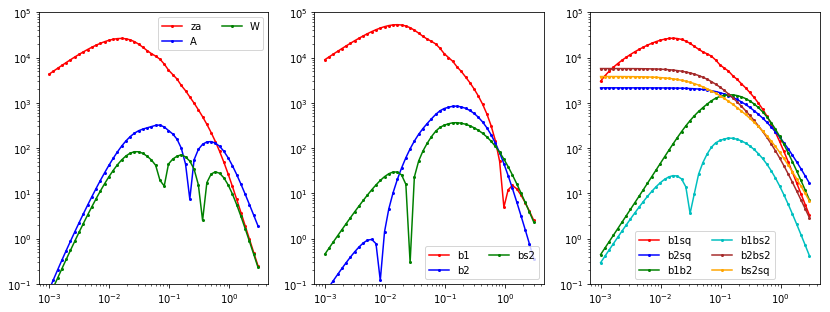

In [140]:
#xi
qv = cl.qv.copy()

fig, axar = plt.subplots(1, 3, figsize = (14, 5))

ax = axar[0]
c = 'r' 
col, lab = 1, 'za'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)
c = 'b' 
col, lab = 2, 'A'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)
c = 'g' 
col, lab = 3, 'W'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)

ax = axar[1]
c = 'r' 
col, lab = 4, 'b1'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)
c = 'b' 
col, lab = 6, 'b2'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)
c = 'g' 
col, lab = 9, 'bs2'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)


ax = axar[2]
c = 'r'
col, lab = 5, 'b1sq'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)

c = 'b'
col, lab = 7, 'b2sq'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)

c = 'g'
col, lab = 8, 'b1b2'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)

c = 'c'
col, lab = 10, 'b1bs2'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)

c = 'brown'
col, lab = 11, 'b2bs2'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)

c = 'orange'
col, lab = 12, 'bs2sq'
tp = pk[col]
ax.plot(pk[0], abs(tp), marker = 'o', ms = ms, color = c, label = lab)

for ax in axar:
    ax.set_ylim(1e-1,1e5)
    ax.set_yscale('log')
    ax.legend(loc = 0, ncol = 2)
    ax.set_xscale('log')

# ax = axar[1]
# ax.set_ylim(0.95,1.05)
# # ax.set_ylim(0.5,3)
# ax.legend(loc = 0, ncol = 2)
# plt.suptitle('Matter Terms')
# plt.savefig('./plots/matter.pdf')




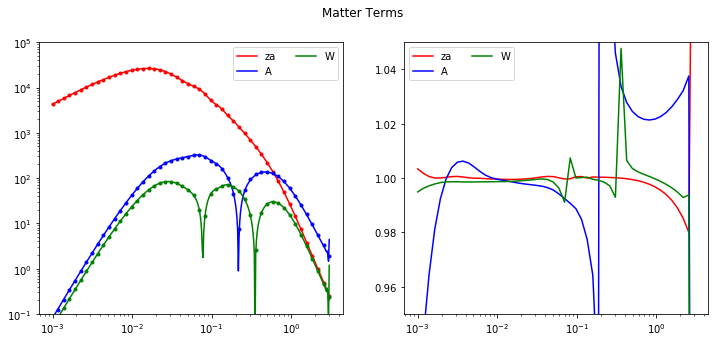

In [141]:
#xi
qv = cl.qv.copy()

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 3

c = 'r' 
col, lab = 1, 'za'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'b' 
col, lab = 2, 'A'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'g' 
col, lab = 3, 'W'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

# c= 'orange'
# tp, tp2 , lab = pk[1:4].sum(axis = 0), zv[1:4].sum(axis = 0), 'Matter'
# ax.plot(zv[0], abs(tp2), label = lab, color = c)
# ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
# ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)



ax.set_ylim(1e-1,1e5)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')
plt.suptitle('Matter Terms')
# plt.savefig('./plots/matter.pdf')




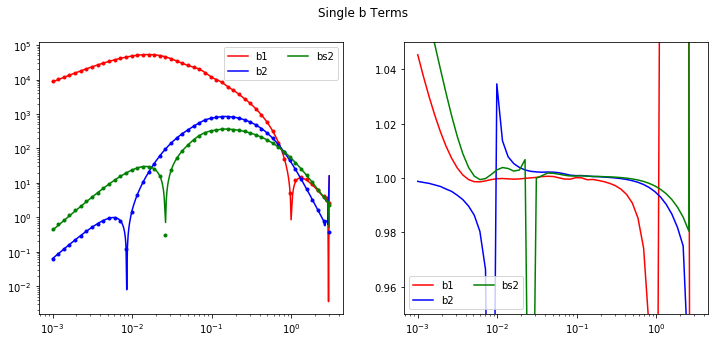

In [142]:
#xi
qv = cl.qv.copy()

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 3

c = 'r'
col, lab = 4, 'b1'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'b'
col, lab = 6, 'b2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'g'
col, lab = 9, 'bs2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)


# ax.set_ylim(1e-1,1e5)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')
plt.suptitle('Single b Terms')
# plt.savefig('./plots/cross.pdf')



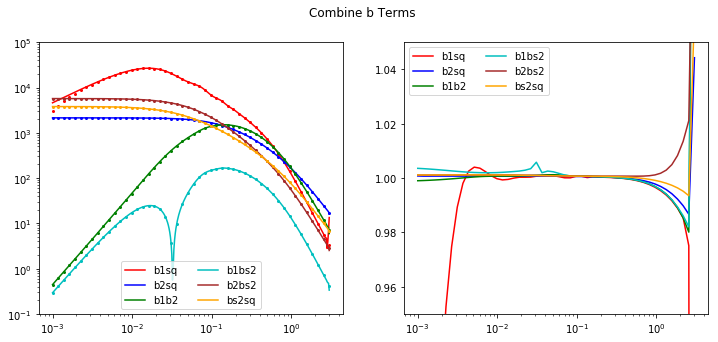

In [143]:
#xi
qv = cl.qv.copy()

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 2

c = 'r'
col, lab = 5, 'b1sq'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'b'
col, lab = 7, 'b2sq'
tp, tp2 = pk[col], zv[col]/4.
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'g'
col, lab = 8, 'b1b2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'c'
col, lab = 10, 'b1bs2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'brown'
col, lab = 11, 'b2bs2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'orange'
col, lab = 12, 'bs2sq'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)




ax.set_ylim(1e-1,1e5)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')
plt.suptitle('Combine b Terms')
# plt.savefig('./plots/auto.pdf')




In [130]:
importlib.reload(cleftpool)

<module 'cleftpool' from '/global/u1/c/chmodi/Programs/Py_codes/Ipython/Lensing/cmbcross/python/PT/cleftpool.py'>